## Python statistics essential training - 04_03_bootstrapping

Standard imports

In [1]:
import math
import io

In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [3]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [11]:
pop = pd.read_csv('grades.csv')
#Poll that asks for a grade of the mayor between 0 & 10
#only 100 samples taken

In [5]:
pop.head()

,grade
0,3.648651
1,5.959915
2,7.387370
3,4.047515
4,2.846912


In [12]:
# The grades given are given in extreme precision (too many decimal places)

<Axes: >

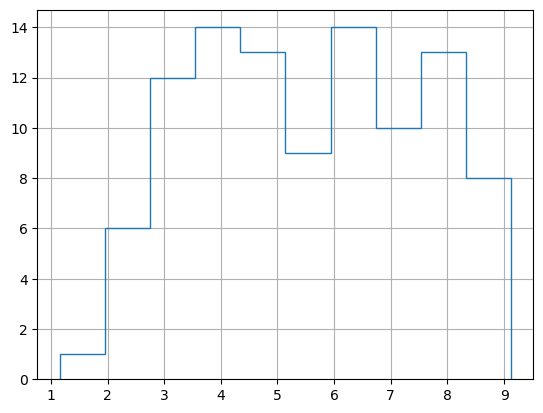

In [6]:
pop.grade.hist(histtype='step')

In [13]:
# Histogram shows no clear distibution

In [8]:
pop.describe() #gives summary stats

,grade
count,100.000000
mean,5.508561
std,1.984988
min,1.160899
25%,3.921372
50%,5.688527
75%,7.272162
max,9.120705


In [14]:
pop.sample(100,replace=True).describe() #single instance of sampling with replacement

,grade
count,100.000000
mean,5.496390
std,2.020419
min,1.983167
25%,4.071281
50%,5.485459
75%,7.413293
max,9.120705


In [15]:
#Bootstrapping: sampling with replacement many times

In [18]:
bootstrap = pd.DataFrame({'meangrade': [pop.sample(100,replace=True).grade.mean() for i in range(1000)]})
# make df of 1000 means through resampling_with_replacement (100 samples each)
# Label the col 'meangrade'

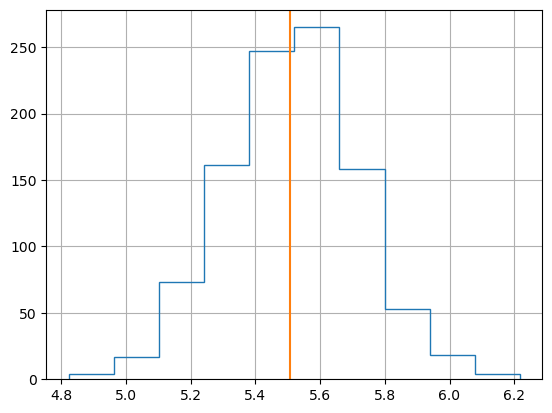

In [20]:
bootstrap.meangrade.hist(histtype='step')
pp.axvline(pop.grade.mean(),color='C1') #the original mean

In [21]:
# the mean has noticable spread around it

In [23]:
#extract the quantiles of the bootstrapped means for the 95% Confidence interval
bootstrap.meangrade.quantile(0.025), bootstrap.meangrade.quantile(0.975)

(5.11641506059506, 5.925669743719725)

# Show how the dataset was really generated
## Quick way above, long but informative way below:

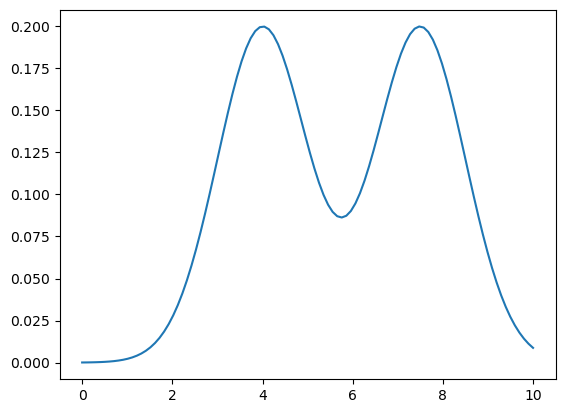

In [24]:
n1 = scipy.stats.norm(7.5,1)
n2 = scipy.stats.norm(4,1)

x = np.linspace(0,10,100)
pp.plot(x,0.5*n1.pdf(x) + 0.5*n2.pdf(x))

In [25]:
def draw():
    while True:
        v = n1.rvs() if np.random.rand() < 0.5 else n2.rvs()
        if 0 <= v <= 10:
            return v

In [27]:
draw()

7.926700157262743

In [28]:
def dataset(n=100):
    return pd.DataFrame({'grade': [draw() for i in range(n)]})

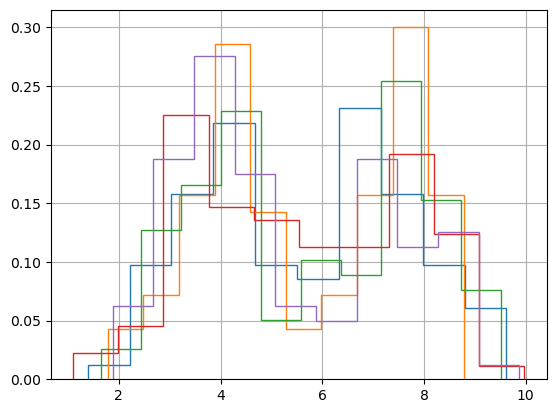

In [29]:
for i in range(5):
    dataset(100).grade.hist(histtype='step',density=True)

In [30]:
means = pd.DataFrame({'meangrade': [dataset(100).grade.mean() for i in range(1000)]})

<Axes: >

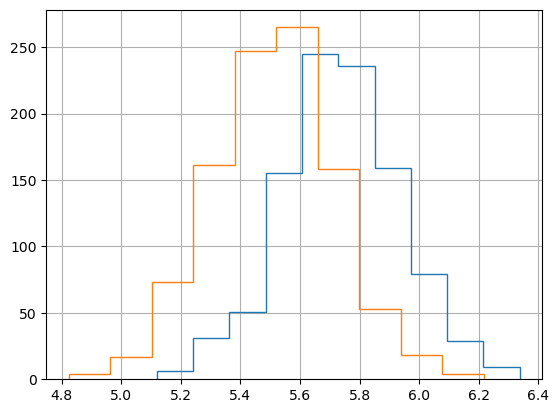

In [31]:
means.meangrade.hist(histtype='step')
bootstrap.meangrade.hist(histtype='step')